# Supermassive Black Holes

Almost every large galaxy with a spheroidal component has a supermassive black hole (SMBH) in its center. These are black holes with masses over $10^6 M_{\odot}$, and they can grow much larger. The mass of the SMBH correlates surprisingly well with other properties of the galaxy, such as the velocity dispersion and luminosity. This is surprising as the SMBH only has a gravitational influence within a pretty small radius compared to the entire galaxy, which suggests that the SMBH evolves along with the galaxy and that their formation is linked. In fact, it seems very likely that these gigantic black holes play a vital role in galaxy evolution, and are a central component of the galaxy as a whole.


In [15]:
import illustris_python as il
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_pickle("../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM.pkl")
late_type = pd.read_pickle("../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_lateType_Gas.pkl")
early_type = pd.read_pickle("../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_earlyType_Gas.pkl")

def power_law_log (a, A, xmin, xmax, steps):
    x = np.logspace(xmin, xmax, steps)
    y= x**(a)*A
    return x, y

#constants
h_tng = 0.678 #Planck 2015
h_tu = 0.7
h_f = 0.7

data["SubhaloHalfmassRadStellar"] = data["SubhaloHalfmassRadStellar"]/h_tng
early_type["SubhaloHalfmassRadStellar"] = early_type["SubhaloHalfmassRadStellar"]/h_tng

data_log = il.formatplot.log_formater(data)
early_type_log = il.formatplot.log_formater(early_type)

TNG data

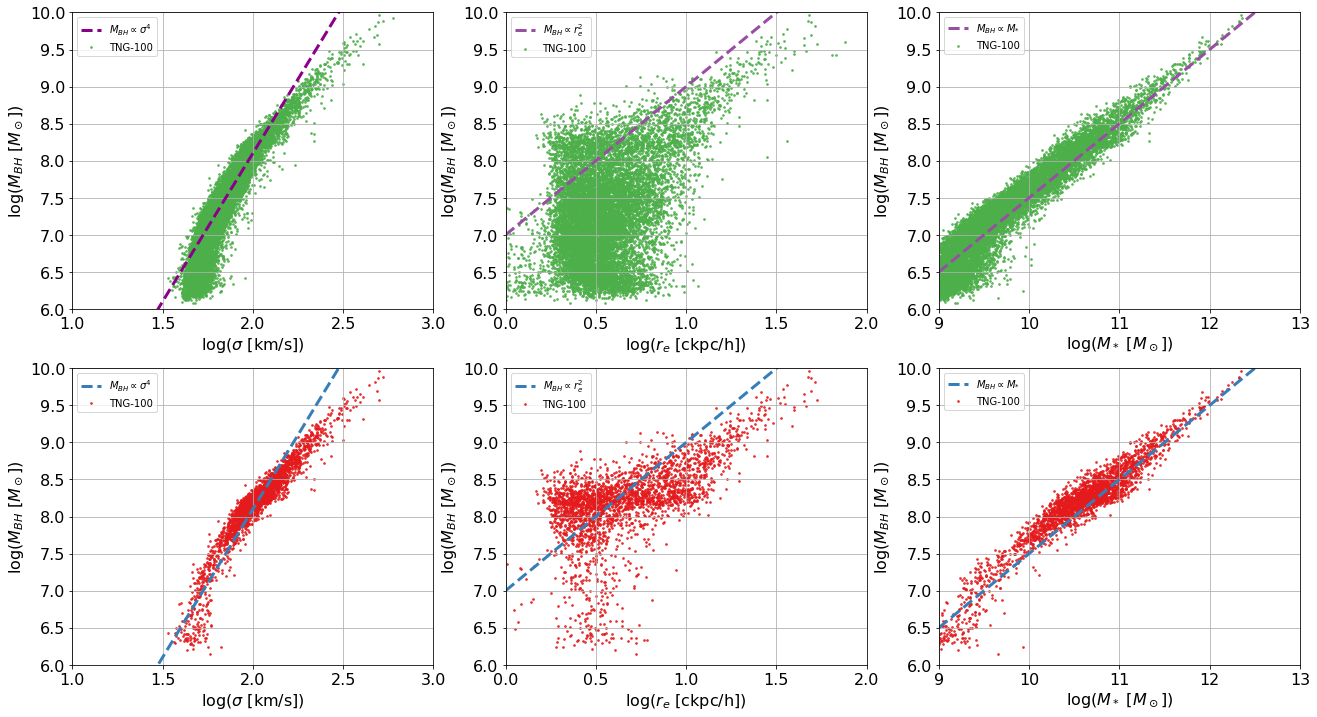

In [16]:
fig1, axs1 = plt.subplots(nrows=2, ncols=3, figsize=(22,12))

#All centrals
data_log.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassBH",s=3, label="TNG-100", alpha=0.8, color="#4daf4a", ax=axs1[0,0])
x1, y1 = power_law_log(a=4, A=10**(0.1), xmin=0, xmax=3, steps=200)
axs1[0,0].plot(np.log10(x1), np.log10(y1), label = r"$M_{BH} \propto \sigma^{4} $",linewidth=3, color ="darkmagenta", linestyle = "--")
il.formatplot.VD_BH(title=r'SMBH - $\sigma$, all galaxies', df=data, ax=axs1[0,0])

data_log.plot.scatter(x="SubhaloHalfmassRadStellar", y="SubhaloMassBH",s=3, label="TNG-100", alpha=0.8, color="#4daf4a", ax=axs1[0,1])
x2, y2 = power_law_log(a=2, A=10**(7), xmin=0, xmax=2, steps=200)
axs1[0,1].plot(np.log10(x2), np.log10(y2), label=r"$M_{BH} \propto r_e^{2} $",linewidth=3, color="#984ea3", linestyle="--")
il.formatplot.R_BH(title=r'SMBH - $r_e$, all galaxies', df=data, ax=axs1[0,1])

data_log.plot.scatter(x="SubhaloMassStellar", y="SubhaloMassBH",s=3, label="TNG-100", alpha=0.8, color="#4daf4a", ax=axs1[0,2])
x3, y3 = power_law_log(a = 1, A= 10**(-2.5), xmin = 9, xmax = 13, steps = 200)
axs1[0,2].plot(np.log10(x3), np.log10(y3), label=r"$M_{BH} \propto M_{*} $",linewidth=3, color="#984ea3", linestyle="--")
il.formatplot.SM_BH(title=r'SMBH - $M_*$, all galaxies', df=data, ax=axs1[0,2])

#ellipticals only
early_type_log.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassBH",s=3, label="TNG-100", alpha=0.8, ax=axs1[1,0], color="#e41a1c")
axs1[1,0].plot(np.log10(x1), np.log10(y1), label=r"$M_{BH} \propto \sigma^{4} $",linewidth=3, color="#377eb8", linestyle = "--")
il.formatplot.VD_BH(title=r'SMBH - $\sigma$, elliptical galaxies', df=early_type, ax=axs1[1,0])

early_type_log.plot.scatter(x="SubhaloHalfmassRadStellar", y="SubhaloMassBH",s=3, label="TNG-100", alpha=0.8, ax=axs1[1,1], color = "#e41a1c")
axs1[1,1].plot(np.log10(x2), np.log10(y2), label=r"$M_{BH} \propto r_e^{2} $",linewidth=3, color="#377eb8", linestyle="--")
il.formatplot.R_BH(title=r'SMBH - $r_e$, elliptical galaxies', df=data, ax=axs1[1,1])

early_type_log.plot.scatter(x="SubhaloMassStellar", y="SubhaloMassBH",s=3, label = "TNG-100", alpha=0.8, ax=axs1[1,2], color = "#e41a1c")
axs1[1,2].plot(np.log10(x3), np.log10(y3), label=r"$M_{BH} \propto M_{*} $", linewidth=3, color="#377eb8", linestyle="--")
il.formatplot.SM_BH(title=r'SMBH - $M_*$, elliptical galaxies', df=early_type, ax=axs1[1,2])

Another interesting relation to look at is the BH mass as a function of the mass of the dark matter halo.

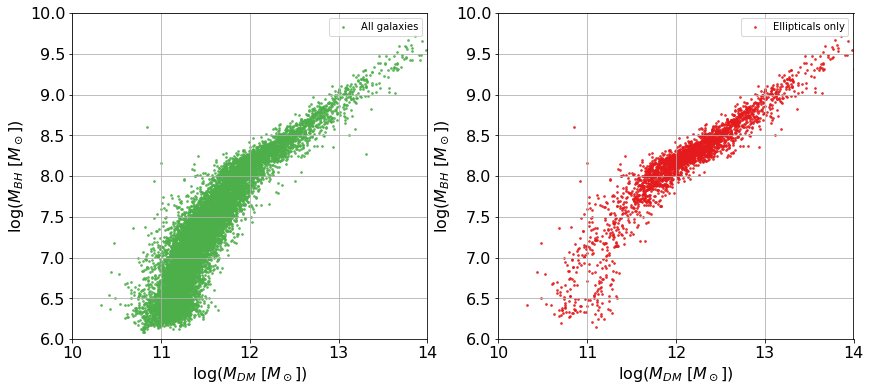

In [17]:
fig2, axs2 = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
data_log.plot.scatter(x="SubhaloMassDM", y="SubhaloMassBH",s=3, label="All galaxies", color="#4daf4a", alpha=0.8, ax=axs2[0])
il.formatplot.DM_BH(title="DM-BH", df=data, ax=axs2[0])

early_type_log.plot.scatter(x="SubhaloMassDM", y="SubhaloMassBH",s=3, label="Ellipticals only", alpha=0.8, ax=axs2[1], color = "#e41a1c")
il.formatplot.DM_BH(title="DM-BH", df=early_type, ax=axs2[1])

Comparing to surveys.

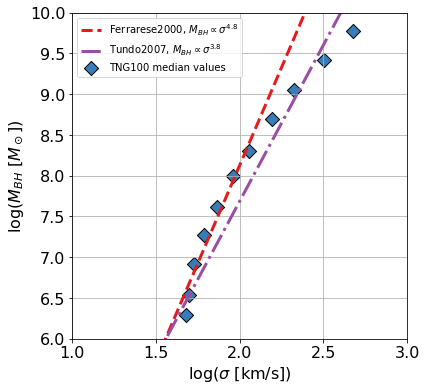

In [23]:
fig3, axs3 = plt.subplots(figsize = (6,6))

#All centrals
#data_log.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassBH",s=3, label="TNG-100", alpha=0.8, color="#4daf4a", ax=axs3)

mx_TNG3, my_TNG3 = il.stats.median_values_log_y(data, "tng", "SubhaloVelDisp", "SubhaloMassBH", ymin=6, ymax=10)
axs3.scatter(np.log10(mx_TNG3), np.log10(my_TNG3), marker='D', s=100, color="#377eb8", edgecolors = "black", label = "TNG100 median values")

xF2000, yF2000 = power_law_log(a=4.8, A=10**(-1.5), xmin=1, xmax=3, steps=200)
xT2007, yT2007 = power_law_log(a=3.83, A=10**(0), xmin=1, xmax=3, steps=200)

#converting to same cosmology
yF2000 = yF2000*h_f**2/h_tng**2
yT2007 = yT2007*h_tu**2/h_tng**2

axs3.plot(np.log10(xF2000), np.log10(yF2000), label=r"Ferrarese2000, $M_{BH} \propto \sigma^{4.8} $", linewidth=3, color="#e41a1c", linestyle="--")
axs3.plot(np.log10(xT2007), np.log10(yT2007), label=r"Tundo2007, $M_{BH} \propto \sigma^{3.8} $", linewidth=3, color="#984ea3", linestyle="-.")
il.formatplot.VD_BH(title=r'SMBH - $\sigma$, all galaxies', df=data, ax=axs3)